The objective of this project is to analyze the Google Play Store dataset to identify the key factors that influence app popularity.

This includes:
- Cleaning and preprocessing raw app data
- Performing exploratory data analysis (EDA)
- Understanding relationships between installs, reviews, ratings, and price
- Identifying top-performing apps and categories
- Creating a data-driven popularity metric

The ultimate goal is to derive meaningful insights about what makes an app successful in the market.

Loading The Dataset

In [7]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("googleplaystore.csv")

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
print("shape of dataset:",df.shape)
print("column names:",df.columns)

shape of dataset: (10841, 13)
column names: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='str')


In [11]:
#statistical summary of numeric columns
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Data Cleaning & Preprocessing

In this phase, raw data is prepared for analysis by fixing inconsistencies and converting features into usable formats.

Steps performed:

- Removed duplicate app entries
- Handled missing values (especially in Rating)
- Cleaned `Installs` column (removed "+" and commas, converted to integer)
- Converted `Price` from string (e.g., "$4.99") to float
- Converted `Size` column into numeric format (MB)
- Removed invalid ratings (e.g., values greater than 5)
- Converted `Last Updated` to datetime format
- Standardized column data types for analysis

This step ensures the dataset is accurate, consistent, and ready for meaningful analysis.

In [12]:
#check missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
#check duplicate rows
df.duplicated().sum()


np.int64(483)

In [14]:
#remove duplicates
df = df.drop_duplicates()
df.shape

(10358, 13)

In [15]:
# Remove + and ,
df["Installs"] = df["Installs"].str.replace("+", "", regex=False)
df["Installs"] = df["Installs"].str.replace(",", "", regex=False)

# Convert safely
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")

# Check how many became NaN
df["Installs"].isnull().sum()


np.int64(1)

In [16]:
#cleaning null and changing datatype to int
df[df["Installs"].isnull()]
df = df.dropna(subset=["Installs"])
df["Installs"] = df["Installs"].astype(int)
df["Installs"].dtype

dtype('int64')

In [17]:
#checking if it has none values if yes remove it else leave
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")
df["Reviews"].isnull().sum()
df["Reviews"].dtype


dtype('int64')

In [18]:
#removing $ from price column
df["Price"] = df["Price"].str.replace("$", "", regex=False)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Price"].dtype


dtype('float64')

In [19]:
# Replace 'Varies with device' with NaN
df["Size"] = df["Size"].replace("Varies with device", np.nan)

# Remove 'M','k' and convert to float
df["Size"] = df["Size"].str.replace("M", "", regex=False)
df["Size"] = df["Size"].str.replace("k", "", regex=False)
df["Size"] = pd.to_numeric(df["Size"], errors="coerce")


In [20]:
df["Size"].dtype
df["Size"].head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [21]:
#handling rating column missing values
#this handles some missing values
df = df.dropna(subset=["Type", "Content Rating", "Current Ver", "Android Ver"])

#dropping rows with missing rating
df = df.dropna(subset=["Rating"])

In [22]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"])
df["Last Updated"].dtype
df["Last Updated"].head(100)

0     2018-01-07
1     2018-01-15
2     2018-08-01
3     2018-06-08
4     2018-06-20
         ...    
97    2018-04-21
98    2018-08-02
99    2017-11-09
100   2018-05-15
101   2018-07-12
Name: Last Updated, Length: 100, dtype: datetime64[us]

In [23]:

df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1468
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [24]:
#removing null values from size and replacing with median
df["Size"] = df["Size"].fillna(df["Size"].median())
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Analysis

In this phase, we explore the cleaned dataset to identify patterns, relationships, and insights about app popularity.

Steps performed:

- Analyzed rating distribution to understand overall app quality
- Examined category-wise app counts and total installs
- Compared Free vs Paid apps (installs and revenue trends)
- Performed correlation analysis between Rating, Reviews, Installs, and Price
- Analyzed relationship between Reviews and Installs (engagement impact)
- Estimated revenue using (Installs × Price)
- Studied app age impact on installs
- Identified top-performing apps and categories

This phase helps uncover the key factors that influence app popularity and market performance.

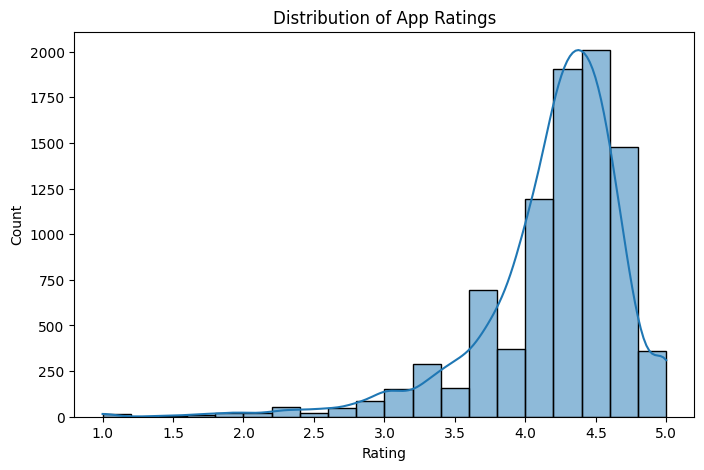

In [25]:
#how app ratings are distributed across playstore dataset
plt.figure(figsize=(8,5))
sns.histplot(df["Rating"], bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


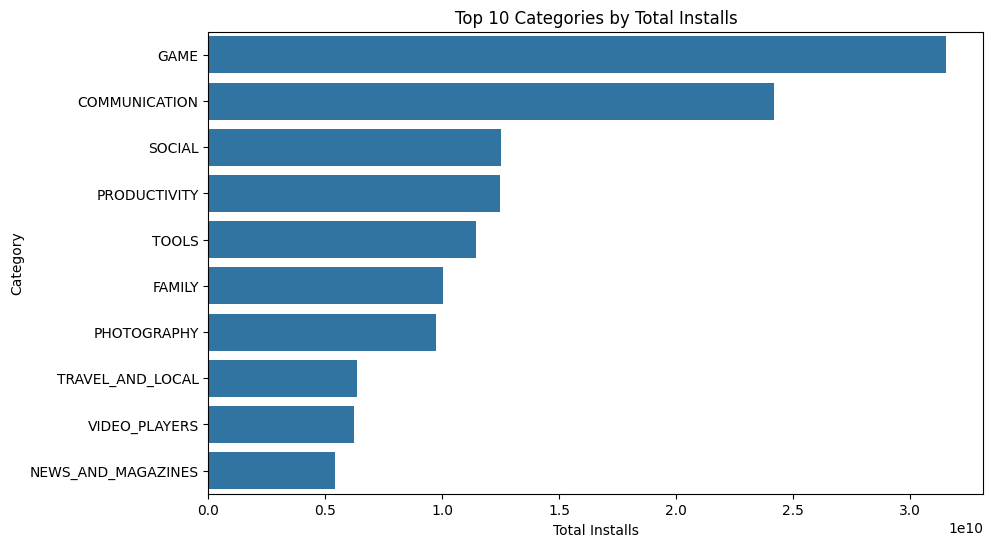

In [26]:
#top 10 categories by total installs
category_installs = df.groupby("Category")["Installs"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=category_installs.values[:10],
            y=category_installs.index[:10])

plt.title("Top 10 Categories by Total Installs")
plt.xlabel("Total Installs")
plt.ylabel("Category")
plt.show()


In [27]:
#total installs of category
df["Category"].value_counts().head(10)


Category
FAMILY             1717
GAME               1074
TOOLS               733
PRODUCTIVITY        334
FINANCE             317
PERSONALIZATION     308
COMMUNICATION       307
LIFESTYLE           305
PHOTOGRAPHY         304
MEDICAL             302
Name: count, dtype: int64

"Although the Game category dominates in total installs, Communication apps outperform other categories in average installs per app, indicating stronger individual app penetration"
tells about real performance

In [28]:
avg_installs = df.groupby("Category")["Installs"].mean().sort_values(ascending=False)
avg_installs.head(10)

Category
COMMUNICATION         7.867180e+07
SOCIAL                5.128624e+07
VIDEO_PLAYERS         3.888686e+07
PRODUCTIVITY          3.731458e+07
PHOTOGRAPHY           3.197777e+07
TRAVEL_AND_LOCAL      3.103346e+07
GAME                  2.937045e+07
NEWS_AND_MAGAZINES    2.520145e+07
ENTERTAINMENT         2.212306e+07
TOOLS                 1.562104e+07
Name: Installs, dtype: float64

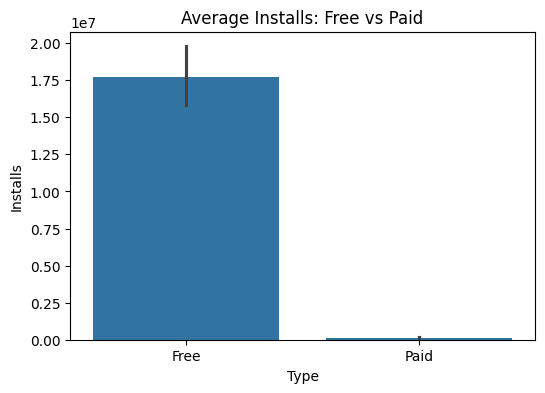

In [29]:
df.groupby("Type")["Installs"].mean()
plt.figure(figsize=(6,4))
sns.barplot(x="Type", y="Installs", data=df)
plt.title("Average Installs: Free vs Paid")
plt.show()


✅ Free apps have much higher average installs
❌ Paid apps have significantly lower installs

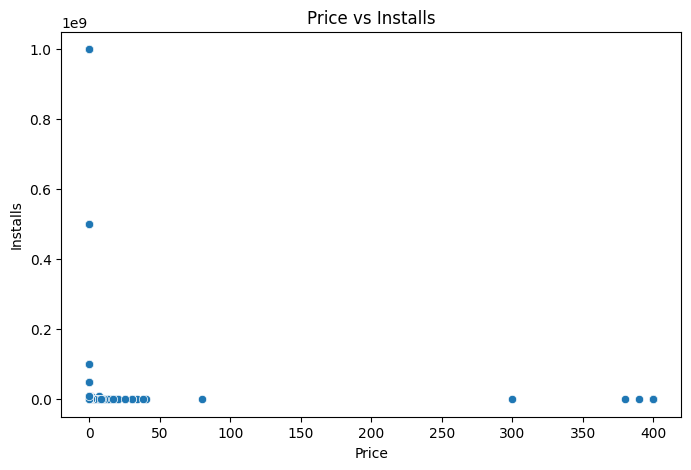

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Price", y="Installs", data=df)
plt.title("Price vs Installs")
plt.show()
#higher apps has low installs

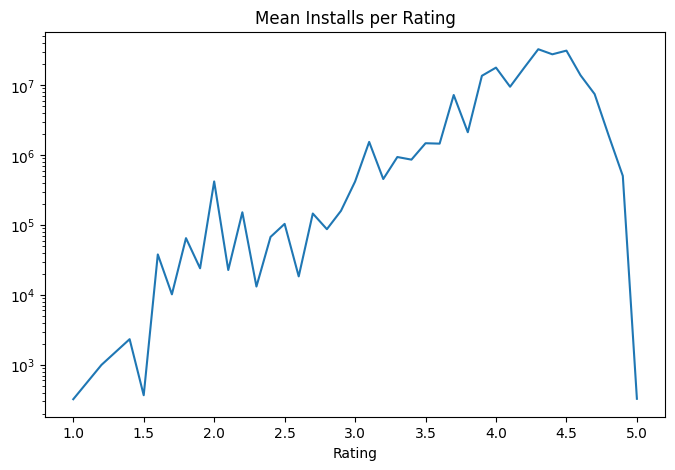

In [ ]:
rating_line = df.groupby("Rating")["Installs"].mean()

plt.figure(figsize=(8,5))
rating_line.plot()
plt.yscale("log")
plt.title("Mean Installs per Rating")
plt.show()


Feature Engineering

In this phase, we create new meaningful features from existing data to improve analysis and better measure app popularity.

Steps performed:

- Created `App_Age` from the `Last Updated` column
- Estimated `Revenue` using (Installs × Price)
- Created a `Popular` label (Top 10% apps based on installs)
- Normalized key features (Installs, Reviews, Rating)
- Built a Custom `Popularity Score` using weighted combination of:
  - Installs
  - Reviews
  - Rating

Feature engineering helps transform raw data into more informative metrics for deeper insights and better decision-making.

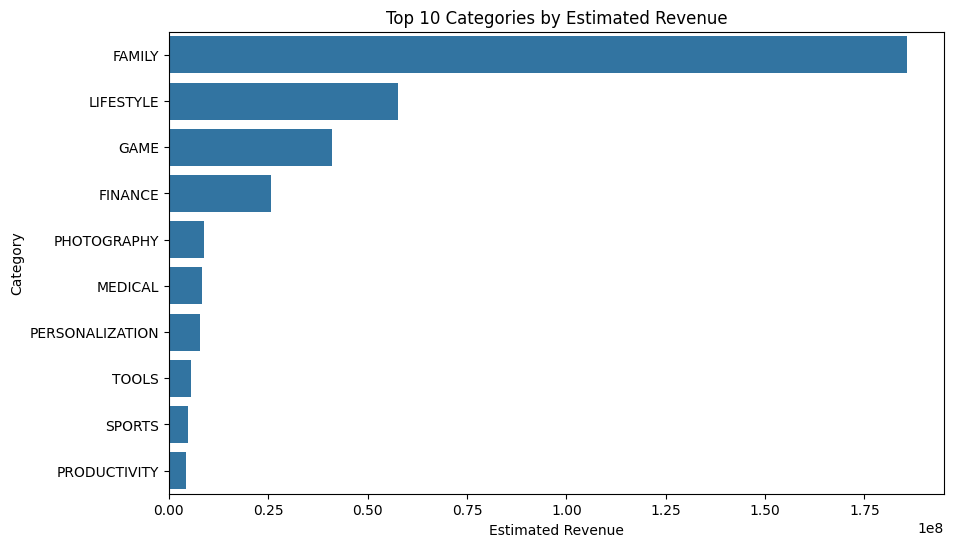

In [32]:
#create column revenue
#Total money earned by each app
#Installs = number of downloads
#Price = cost per download

df["Revenue"] = df["Installs"] * df["Price"]
df["Revenue"].head()
revenue_by_category = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=revenue_by_category.values[:10],
            y=revenue_by_category.index[:10])

plt.title("Top 10 Categories by Estimated Revenue")
plt.xlabel("Estimated Revenue")
plt.ylabel("Category")
plt.show()


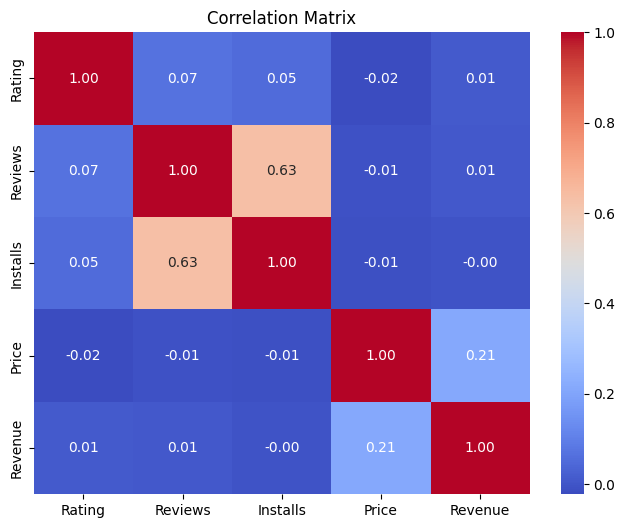

In [33]:
numeric_cols = ["Rating", "Reviews", "Installs", "Price", "Revenue"]

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [34]:
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)


            Rating   Reviews  Installs     Price   Revenue
Rating    1.000000  0.068724  0.050869 -0.022371  0.009792
Reviews   0.068724  1.000000  0.633422 -0.009562  0.005622
Installs  0.050869  0.633422  1.000000 -0.011334 -0.004985
Price    -0.022371 -0.009562 -0.011334  1.000000  0.211418
Revenue   0.009792  0.005622 -0.004985  0.211418  1.000000


Reviews and Installs are strongly related → Reviews can be a predictor for popularity

Rating and Installs have almost no correlation → Quality doesn’t guarantee popularity

Price doesn’t strongly affect installs → Most apps are free, so skewed

C:\Users\260016573\AppData\Local\Temp\ipykernel_26948\720534623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values[:10],


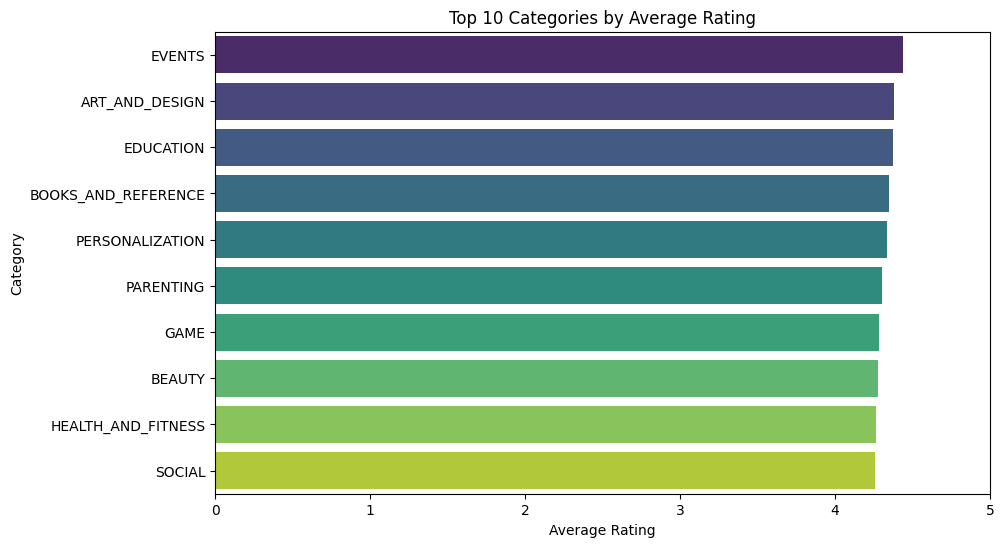

In [35]:
#average rating per category
avg_rating = df.groupby("Category")["Rating"].mean().sort_values(ascending=False)
avg_rating.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating.values[:10],
            y=avg_rating.index[:10],
            palette="viridis")
plt.title("Top 10 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.xlim(0,5)
plt.show()


While Game and Social categories dominate in total installs, niche categories such as EVENTS, ART_AND_DESIGN, and EDUCATION have the highest average rating. This suggests that smaller categories focus more on app quality rather than volume

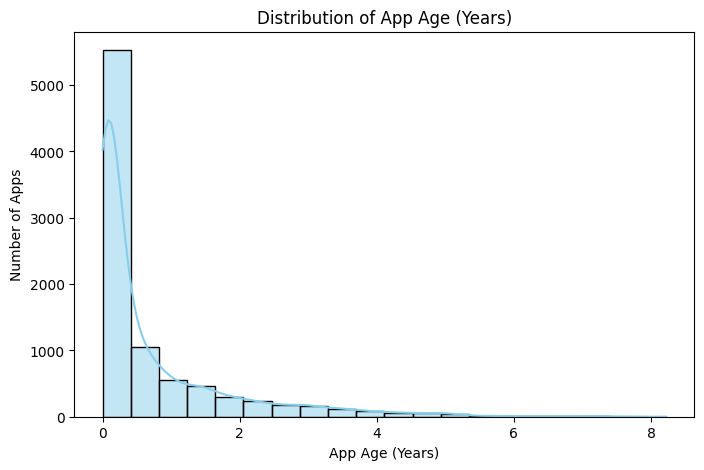

In [36]:
#telling age of apps
# Calculate age in days
df["App_Age_Days"] = (df["Last Updated"].max() - df["Last Updated"]).dt.days

# Optional: convert to years
df["App_Age_Years"] = df["App_Age_Days"] / 365
df[["App", "App_Age_Years", "Installs"]].head()
df["App_Age_Years"].describe()
plt.figure(figsize=(8,5))
sns.histplot(df["App_Age_Years"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of App Age (Years)")
plt.xlabel("App Age (Years)")
plt.ylabel("Number of Apps")
plt.show()



Popular Apps
Popularity can mean different things:

1.Highest Installs

2.Highest Reviews

3.High Rating + High Installs

4.Custom Popularity Score
If we only use Installs, we just get obvious answers.

STEP 1 — Normalize the Metrics

Because:

Installs → very large numbers

Reviews → large numbers

Rating → 1–5 scale

We must normalize them first.

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["Installs_Norm", "Reviews_Norm", "Rating_Norm"]] = scaler.fit_transform(
    df[["Installs", "Reviews", "Rating"]]
)

STEP 2 — Create Custom Popularity Score

You decide weights.

Example (balanced approach):

Installs → 50%

Reviews → 30%

Rating → 20%

In [38]:
df["Popularity_Score"] = (
    0.5 * df["Installs_Norm"] +
    0.3 * df["Reviews_Norm"] +
    0.2 * df["Rating_Norm"]
)
#now every app will have same popularity score

STEP 3 — Get Truly Popular Apps

In [39]:
top_popular = df.sort_values("Popularity_Score", ascending=False)[
    ["App", "Category", "Installs", "Reviews", "Rating", "Popularity_Score"]
].head(20)

top_popular


,App,Category,Installs,Reviews,Rating,Popularity_Score
2544,Facebook,SOCIAL,1000000000,78158306,4.1,0.955000
3943,Facebook,SOCIAL,1000000000,78128208,4.1,0.954884
336,WhatsApp Messenger,COMMUNICATION,1000000000,69119316,4.4,0.935305
3904,WhatsApp Messenger,COMMUNICATION,1000000000,69109672,4.4,0.935268
2604,Instagram,SOCIAL,1000000000,66577446,4.5,0.930548
2545,Instagram,SOCIAL,1000000000,66577313,4.5,0.930548
3909,Instagram,SOCIAL,1000000000,66509917,4.5,0.930289
382,Messenger – Text and Video Chat for Free,COMMUNICATION,1000000000,56646578,4.0,0.867430
335,Messenger – Text and Video Chat for Free,COMMUNICATION,1000000000,56642847,4.0,0.867416
1872,Subway Surfers,GAME,1000000000,27725352,4.5,0.781420


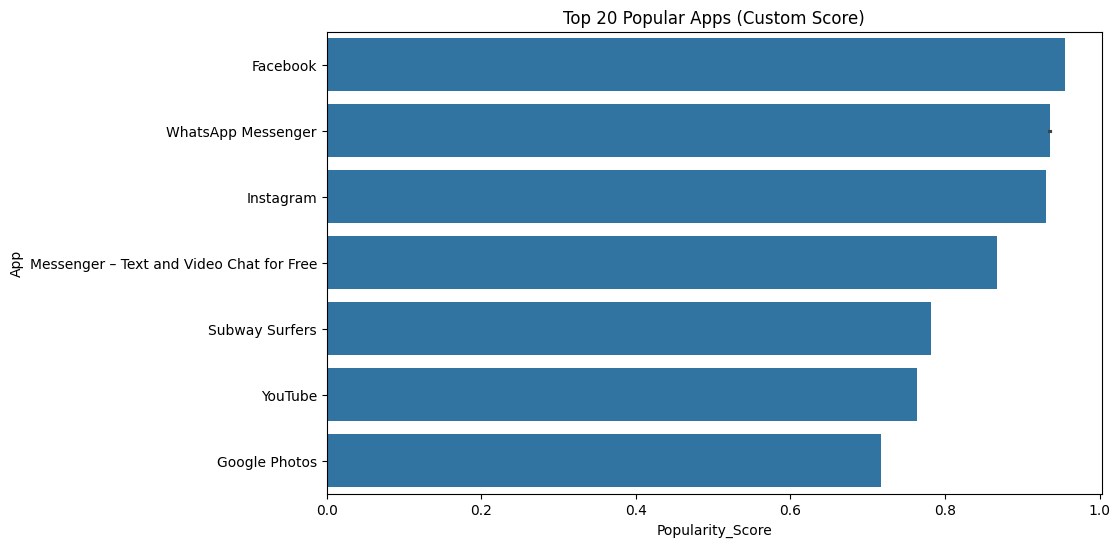

In [40]:
top_20 = df.sort_values("Popularity_Score", ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x="Popularity_Score",
            y="App",
            data=top_20)

plt.title("Top 20 Popular Apps (Custom Score)")
plt.show()
